In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

data = pd.read_csv('/Users/andreihauryk/Desktop/dataset_3.csv', index_col = 0)
data.head()

,67192,1
67140,,
67148,67308,1
67152,67276,1
67180,67168,1
67180,67168,1
67180,67168,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27450 entries, 67148 to 66460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   67192   27450 non-null  int64
 1   1       27450 non-null  int64
dtypes: int64(2)
memory usage: 643.4 KB


In [11]:
data.isnull().any()

67192    False
1        False
dtype: bool

In [12]:
data.shape

(27450, 2)

In [13]:
temp_data = data['1']
data_x = data.copy()
data_x = data_x.drop('1', axis =1)
X = data_x
print("    __X__")
X.head()

    __X__


,67192
67140,
67148,67308
67152,67276
67180,67168
67180,67168
67180,67168


In [14]:
le = LabelEncoder()

temp_data = le.fit_transform(temp_data)
Y = temp_data
print("__Y__")
Y

__Y__


array([1, 1, 1, ..., 0, 1, 1])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)


print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)


Training split input-  (21960, 1)
Testing split input-  (5490, 1)


In [16]:
decision_tree=DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print("Accurancy on training set: {:3f}".format(decision_tree.score(x_train,y_train)))
print("Accurancy on test set: {:3f}".format(decision_tree.score(x_test,y_test)))



Accurancy on training set: 0.506421
Accurancy on test set: 0.503643


[Text(744.0, 951.3000000000001, '67192 <= 66218.0\ngini = 0.4999\nsamples = 21960\nvalue = [10847, 11113]\nclass = target'),
 Text(558.0, 679.5, '67192 <= 66136.0\ngini = 0.4999\nsamples = 21926\nvalue = [10847, 11079]\nclass = target'),
 Text(372.0, 407.70000000000005, '67192 <= 66072.0\ngini = 0.4998\nsamples = 10880\nvalue = [5320, 5560]\nclass = target'),
 Text(186.0, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = target'),
 Text(558.0, 135.89999999999998, 'gini = 0.4998\nsamples = 10878\nvalue = [5320, 5558]\nclass = target'),
 Text(744.0, 407.70000000000005, 'gini = 0.5\nsamples = 11046\nvalue = [5527, 5519]\nclass = pc'),
 Text(930.0, 679.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]\nclass = target')]

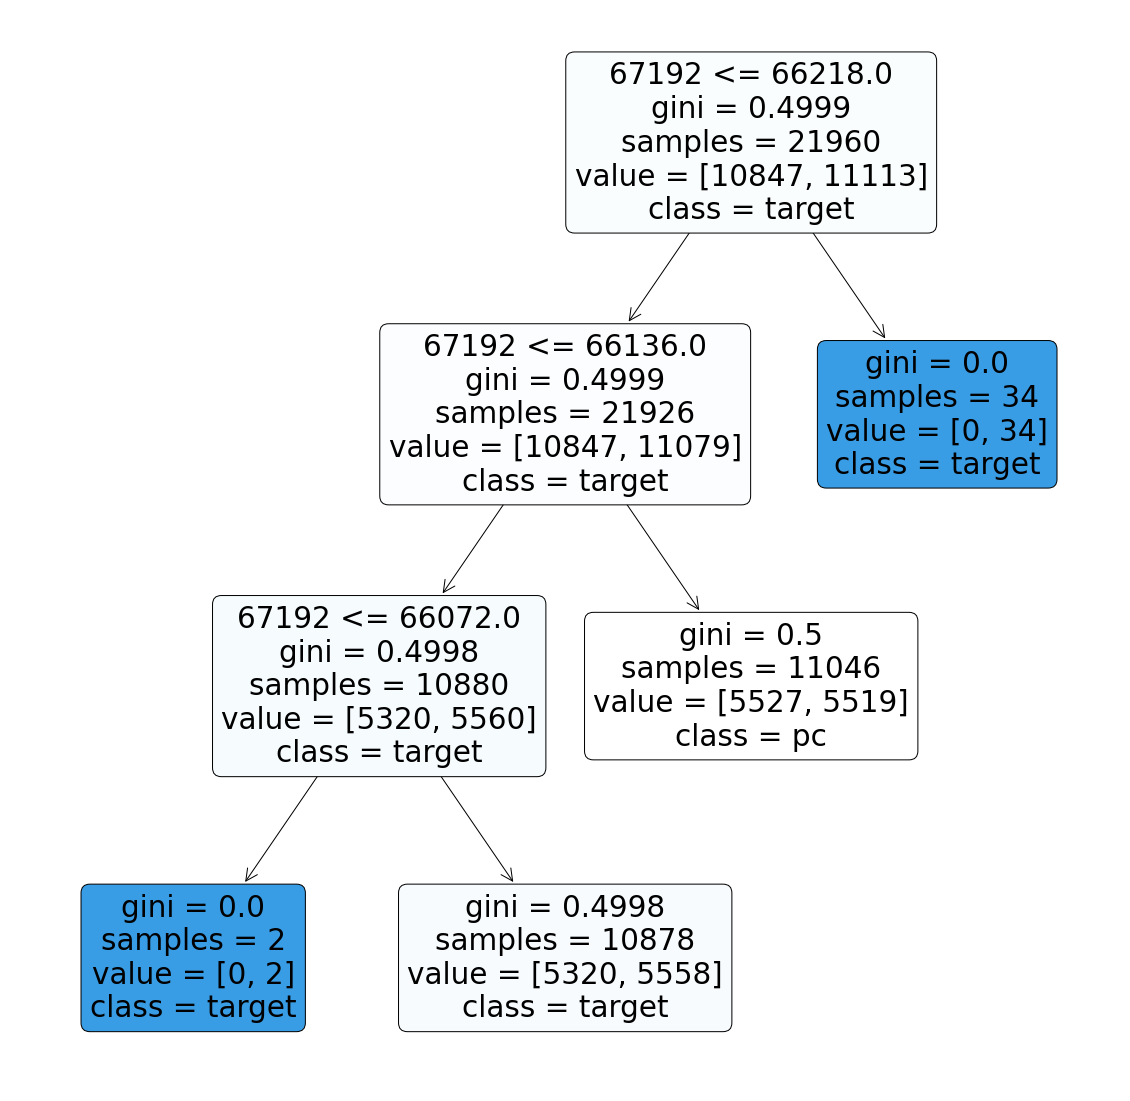

In [17]:
plt.figure(figsize = (20,20))
decision_tree = plot_tree(decision_tree=decision_tree, feature_names = data_x.columns, 
                     class_names =["pc", "target", "Taken,y or n"] , filled = True , precision = 4, rounded = True)

plt.savefig("decision_tree_dataset3.png")
decision_tree

In [18]:
print("Predicted values:\n",y_pred)

Predicted values:
 [0 1 1 ... 0 1 1]


In [19]:
decision_tree_2=DecisionTreeClassifier(criterion="entropy",max_depth=3)
desion_tree_2 = decision_tree_2.fit(x_train,y_train)
y_pred_2 = decision_tree_2.predict(x_test)
print("Accurancy on training set: {:3f}".format(decision_tree_2.score(x_train,y_train)))
print("Accurancy on test set: {:3f}".format(decision_tree_2.score(x_test,y_test)))

Accurancy on training set: 0.506421
Accurancy on test set: 0.503643


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   0 2733]
 [   0 2757]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2733
           1       0.50      1.00      0.67      2757

    accuracy                           0.50      5490
   macro avg       0.25      0.50      0.33      5490
weighted avg       0.25      0.50      0.34      5490

0.5021857923497268


/Users/andreihauryk/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
